Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5409 - loss: 0.6850 - val_accuracy: 0.6500 - val_loss: 0.6538
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6662 - loss: 0.6418 - val_accuracy: 0.5813 - val_loss: 0.6276
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.5848 - val_accuracy: 0.8188 - val_loss: 0.4771
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.4527 - val_accuracy: 0.7937 - val_loss: 0.4367
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8619 - loss: 0.3771 - val_accuracy: 0.8562 - val_loss: 0.3607
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.3354 - val_accuracy: 0.8625 - val_loss: 0.3193
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8930 - loss: 0.3165 - val_accuracy: 0.8562 - val_loss: 0.3069
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.2805 - val_accuracy: 0.9250 - val_loss:

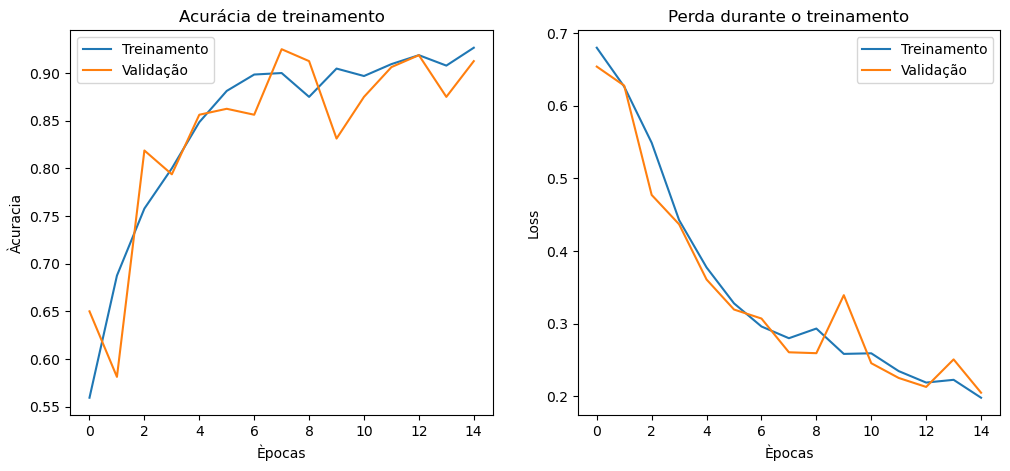

In [14]:
import numpy as np
import tensorflow as tf # Biblioteca usadas em redes neurais
from tensorflow.keras.models import Sequential # Modelo sequencial (Camadas empilhadas )
from tensorflow.keras.layers import SimpleRNN, Dense # Canadas de neuronio: RNN simples e camada de saida Dense
from sklearn.model_selection import train_test_split # Separa os dados de treino e teste
import matplotlib.pyplot as plt  # gera de gráficos

# Simulação dos dados climaticos do norte 
num_samples = 1000  #Quantidade de semanas simuladas
sequence_lenght = 7 # Cada entrada tera 7 dias consecutivos
features = 3 # cada entrada tem 3 variaveis: Temperatura, umidade e pressão

X = np.random.rand(num_samples, sequence_lenght, features) # dados aleatorio representados (Entradas)

labels = (X[:, :, 1].mean(axis=1) > 0.5).astype(int) # Rótulo: se a umidade for kaoir que 0.5 - choveu(1), senão (0)

# Separação de grupo de teste e treino 
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=12)

model = Sequential() #Modelo sequencial 
model.add(SimpleRNN(32, input_shape=(sequence_lenght, features), activation='tanh')) 
# Camada de 32 neuronio usando as informações de enrtradas e função de ativação tanh (tangente hiperbolica)
model.add(Dense(1, activation='sigmoid')) # Camada de saída binário usando a função sigmoid

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# fit TREINO
hitory = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=16, #multiplos de 2 geralmente
                    validation_split=0.2,
                    verbose=1)

plt.figure(figsize=(12,5))

# gráfico ocurária
plt.subplot(1,2,1)
plt.plot(hitory.history['accuracy'], label='Treinamento')
plt.plot(hitory.history['val_accuracy'], label='Validação')
plt.title('Acurácia de treinamento')
plt.xlabel('Èpocas')
plt.ylabel('Àcuracia')
plt.legend()

# gráfico da perda (loss)
plt.subplot(1,2,2)
plt.plot(hitory.history['loss'], label='Treinamento')
plt.plot(hitory.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Èpocas')
plt.ylabel('Loss')
plt.legend()

